Mar 2015, J. Slavič

Predavanje 5

# Simbolično računanje s ``SymPy``

To predavanje temelji na virih:
* J.R. Johansson [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures) in
* [SymPy](http://sympy.org/en/index.html) - uradna dokumentacija modula.

``SymPy`` je eden od sistemov za strojno algebro (*computer Algebra Systems*), ki pa ima poleg zmogljivosti tudi to prednost, da je v celoti napisan v Pythonu. Alternativa bi lahko bila npr. [Sage](http://www.sagemath.org/).

Nekatera namenska komercialna orodja:
* [Mathematica](http://www.wolfram.com/mathematica) 
* [Maple](http://www.maplesoft.com/products/maple) 

Najprej uvozimo celotni modul ``SymPy``. Tukaj bomo naredili izjemo in uvozili celotni modul z \* (temu se praviloma izogibamo, saj zavzamemo veliko imenskega prostora).

In [6]:
from sympy import *

In [7]:
import sympy as ss

Zato, da dobimo lepo oblikovan $\LaTeX$ izpis uporabimo:

In [2]:
init_printing()

## Definiranje spremenljivk

Spremenljivke definiramo takole:

In [22]:
x, y, k = symbols('x y k')

In [17]:
x**y

Primer simboličnega izračuna:

In [19]:
sin(1.2*pi + x)**2

In [20]:
sin(pi + x)**2

Če želimo, lahko izraz priredimo spremenljivki:

In [26]:
f = sin(k*x)

Če želimo zapisati enačbo, to naredimo takole:

In [27]:
en = Eq(sin(k*x),0.5)
en

Spremenljivke lahko definiramo tudi tako:

In [28]:
a, b, c = symbols('a b c')# ali tudi: symbols('a', 'b', 'c')

In [29]:
type(a)

sympy.core.symbol.Symbol

Pri definiranju spremenljivk lahko dodajamo predpostavke:

In [43]:
x = Symbol('x', prime=True, positive=True)

In [44]:
x.is_prime

True

In [45]:
x.is_positive

True

In [46]:
x < 0

False

In [49]:
c = symbols('c', positive=True)

In [50]:
c<0

False

In [53]:
c.assumptions0

{'real': True,
 'nonpositive': False,
 'negative': False,
 'zero': False,
 'hermitian': True,
 'imaginary': False,
 'commutative': True,
 'nonzero': True,
 'complex': True,
 'positive': True,
 'nonnegative': True}

## Kompleksna število

Imaginarno število se zapiše z ``I``: 

In [54]:
1+1*I

In [55]:
I**2

In [56]:
(x * I + 1)**2

## Racionalna števila

``SymPy`` pozna tri numerične tipe: ``Real``, ``Rational``, ``Integer``: 

In [57]:
r1 = Rational(4, 5)
r2 = Rational(5, 4)

In [58]:
r1

In [59]:
r1+r2

In [60]:
r1/r2

## Numerični izračun

SymPy uporablja nekatere konstante, npr: ``pi``, ``E`` in ``oo`` za neskončnost.

Če želimo za določeni izraz izračunati numerično vrednost, potem uporabmo funkcijo ``evalf`` ali ``N``, ki imata argument ``n`` (število decimalnih mest).

In [67]:
N(pi,10)

In [70]:
pi.evalf(n=30)

In [71]:
y = symbols('y')

In [74]:
f = (x**y + pi)**2
f

In [77]:
N(f, 5) # enako kot evalf

Za simbole lahko uporabimo tudi numerične vrednosti, to naredimo s funkcijo ``subs``:

In [79]:
f.subs(x, 1.5)

V ``subs`` funkciji lahko uporabimo tudi slovar ali terko:

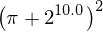

In [82]:
f.subs({x: 2, y: 10.})

In [84]:
N(f.subs({x: 1.5, y: 2}))

In [85]:
f.subs([(x, 1.5)])

Funkcija ``subs`` je lahko seveda drugi simbol ali izraz:

In [87]:
f.subs(x, y + oo)

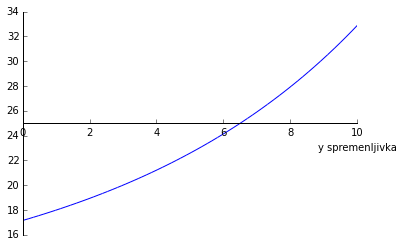

In [95]:
plot(f.subs(x, 1.1), (y, 0, 10), xlabel='y spremenljivka')

### ``SymPy`` in ``NumPy``

In [96]:
import numpy as np

In [98]:
x_vec = np.arange(0, 10, 0.1)

In [104]:
%%timeit
y_vec = np.array([N(((x + pi)**2).subs(x, _)) for _ in x_vec])

10 loops, best of 3: 20.6 ms per loop


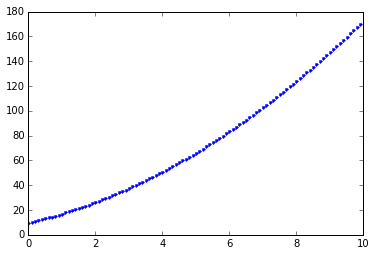

In [100]:
fig, ax = subplots()
ax.plot(x_vec, y_vec, 'b.');

#### Uporaba ``lambda`` funkcije

Zgornji način je relativno počasen. Bistveno hitrejši je uporaba pristopa ``lambdify`` kjer se pripravi prevedena funkcija:

In [102]:
f_hitra = lambdify([x], (x + pi)**2, 'numpy')

In [106]:
%%timeit
y_vec = f_hitra(x_vec)
#y_vec[:10]

100000 loops, best of 3: 1.74 µs per loop


# Grafični prikaz

``SymPy`` ima na ``matplotlib`` temelječo prikaz podatkov. Prikaz je sicer glede na ``matplotlib`` bolj omejen in ga uporabljamo za preproste prikaze (sicer pa ``numpy``).

Pomoč je tukaj: http://docs.sympy.org/latest/modules/plotting.html

Primer:

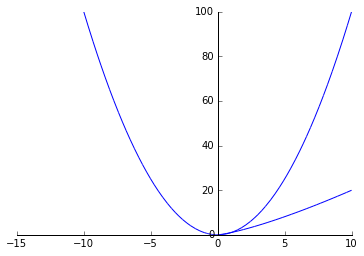

In [110]:
plot(x**2, x**1.3);

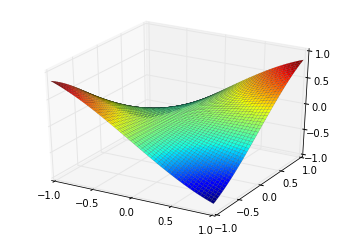

In [108]:
plotting.plot3d(sin(x*y), (x, -1, 1), (y, -1, 1));

# Algebra

V tem poglavju si bomo pogledali nekatere osnove uporabe ``SymPy`` za algebrajske operacije.

## Uporaba ``expand`` in ``factor``

Definirajmo matematični izraz:

In [111]:
f = (x+1)*(x+2)*(x+3)
f

in ga sedaj **razčlenimo** (*expand*):

In [113]:
aa = expand(f)
aa

Če želimo sedaj pogledati konstanto pred ``x``, naredimo to s funkcijo ``coeff``:

In [115]:
aa.coeff(x)

Argumenti funkcije definirajo kakšno razširitev želimo (glejte help!). Če želimo npr. trigonometrično razširitev, potem uporabimo ``trig=True``:

In [116]:
expand(sin(a+b))

In [119]:
expand(sin(a+b), trig=True)

Obratna operacija od razčlenitve je **razcepitev** (*factor*): 

In [120]:
factor(x**3 + 6 * x**2 + 11*x + 6)

Če nas zanimajo posamezni členi, potem to naredimo takole:

In [121]:
factor_list(x**3 + 6 * x**2 + 11*x + 6)

## Poenostavljanje izrazov s ``simplify``

Funkcija ``simplify`` poskuša poenostaviti izraze v bolj preproste (npr. s krajšanjem spremenljivk). Za posebne namene lahko poenostavimo tudi z: ``trigsimp``, ``powsimp``, ``logcombine``, in podobno. 

Več tukaj: http://docs.sympy.org/latest/tutorial/simplification.html

In [122]:
simplify((x+1)*(x+1)*(x+3))

In [123]:
simplify(sin(a)**2 + cos(a)**2)

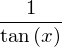

In [124]:
simplify(cos(x)/sin(x))

## Uporaba ``apart`` in ``together``

Funkciji uporabljamo za delo z ulomki:

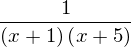

In [125]:
f1 = 1/((1 + x) * (5 + x))
f1

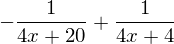

In [126]:
f2 = apart(f1, x)
f2

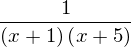

In [127]:
together(f2)

V tem primeru pridemo do podobnega rezultata s ``simplify``:

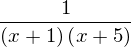

In [128]:
simplify(f2)

# Odvajanje

Odvajanje je načeloma relativno preprosta matematična operacija, ki jo izvedemo s funkcijo ``diff``. Prvi argument je funkcija, ki jo odvajamo po drugem argumentu:

In [131]:
x, y, z = symbols('x y z')
f = sin(x*y) + cos(y*z)
diff(f, x)

Odvodi višjega reda:

In [132]:
diff(f, x, x, x)

Drugačna oblika zgornjega odvoda:

In [53]:
diff(f, x, 3)

Odvod po več spremenljivkah $\frac{d^3f}{dx\,dy^2}$ izvedemo takole:

In [54]:
diff(f, x, 1, y, 2)

# Integriranje

Integriranje izvajamo s funkcijo ``integrate``, ki v primeru nedoločenega integriranja sprejme dva argumenta: funkcijo in spremenljivke po kateri integriramo:

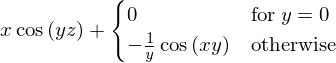

In [133]:
integrate(f, x)

Določeno integriranje izvedemo z definiranjem integracijskih mej:

In [134]:
integrate(f, (x, -1, 1))

V kolikor so meje v neskončnosti, integriramo z vgrajeno konstanto za neskončnost ``oo``:

In [57]:
integrate(exp(-x**2), (x, -oo, oo))

# Vsota in produkt vrste

Vsoto vrste definiramo s pomočju funkcije ``Sum`` (velika črka, ker je ``sum`` že rezervirana v paketu ``numpy``):

In [58]:
n = Symbol("n")

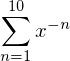

In [59]:
#f = Sum(1/x**n, (n, 1, oo))
f = Sum(1/x**n, (n, 1, 10))
f

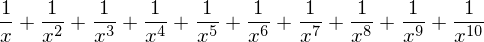

In [60]:
f.doit()

In [61]:
f.subs({x: 3}).evalf()

Produkt vrste definiramo podobno s funkcijo ``Product``:

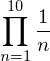

In [62]:
f = Product(1/n, (n, 1, 10))
f

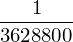

In [63]:
f.doit()

# Limitni račun

Limite računamo s pomočjo funkcije ``limit``: 

In [64]:
limit(sin(x)/x, x, 0)

Poglejmo kako lahko s funkcijo ``limit`` preverimo rezultat odvajanja s funkcijo ``diff``.

Za funkcijo:

In [65]:
f = sin(x*y) + cos(y*z)
diff(f, x)

mora veljati $\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$. Preverimo, če res:

In [66]:
h = Symbol("h")

In [67]:
limit((f.subs(x, x+h) - f)/h, h, 0)

# Taylorjeve vrste

Taylorjeve vrste se izračunjo s pomočjo funkcijo ``series``:

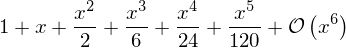

In [68]:
series(exp(x), x) # privzete vrednosti x0=0, in n=6

Če želimo definirati drugo izhodišče ($x0=2$) in z več členi ($n=8$), to izvedemo takole:

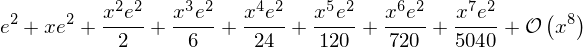

In [69]:
series(exp(x), x, x0=2, n=8)

Rezultat vklučuje tudi red veljavnosti; na tak način lahko kontroliramo veljavnosti izvajanja. Primer:

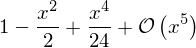

In [70]:
s1 = cos(x).series(x, 0, 5)
s1

In [71]:
s2 = sin(x).series(x, 0, 2)
s2

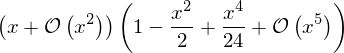

In [72]:
s1 * s2

Ugotovimo, da členi stopnje 2 in več niso smiselni:

In [73]:
s3 = simplify(s1 * s2)

Podatek o stopnji veljavnosti lahko odstranimo:

In [74]:
s3.removeO()

# Linearna algebra

## Matrike in vektorji

Matrike in vektorje definiramo s funkcjo ``Matrix``:

In [75]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

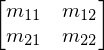

In [76]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [77]:
b = Matrix([[b1], [b2]])
b

Tipične operacije:

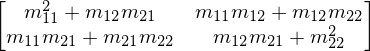

In [78]:
A**2

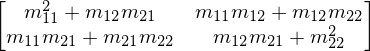

In [79]:
A*A

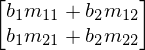

In [80]:
A * b

Ker uporabljamo *matrični* zapis, moramo paziti na stolpične in vrstične vektorje (spomnimo se: pri ``numpy`` uporabljamo sezname in nam na to ni potrebno paziti)

In [81]:
b.T*b

Determinanta, inverz:

In [82]:
A.det()

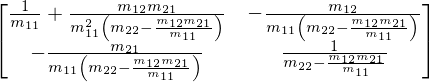

In [83]:
A.inv()

# Reševanje enačb

Enačbe in sistem enačb rešujemo s funkcijo ``solve``:

In [426]:
en = Eq(sin(x**2), 1/2)
en

In [428]:
solve(en, x)

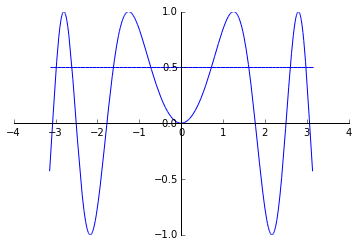

In [435]:
plot(sin(x**2), 0.5, (x, -pi, pi));

Gre za nelinearno enačbo z več rešitvami. Rešitev lahko iščemo tudi numerično v izbrani okolici:

In [452]:
sol = nsolve(en, x, 3)
#N(sol,10)
N(sol)

Kvadratna enačba

In [437]:
a, b, c = symbols(('a', 'b', 'c'))
solve(a*x**2 + b*x + c, x)

Sistem enačb

In [439]:
x, y = symbols('x y')
solve([x + y - 1, x - y - 1], [x, y])

# Reševanje diferencialnih enačb

Preprost primer na površini s koeficientom trenja $\mu$ drseče mase $m$. Začetna hitrost je $v_0$.

Definirajmo simbole:

In [384]:
x = symbols('x') # ali lahko tudi x = Function('x')
t, m, mu, g, v0 = symbols('t m mu g v0', real=True, positive=True)

Definirajmo diferencialno enačbo:

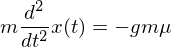

In [385]:
eq = Eq(m*x(t).diff(t,2), -mu*g*m)
eq

Nekaj lastnosti:

In [387]:
ode_order(eq, x(t))

In [388]:
classify_ode(eq)

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

Rešitev:

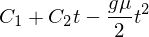

In [390]:
x_r=dsolve(eq, x(t)).args[1]
x_r

Začetni pogoji:

In [394]:
C1 = solve(Eq(x_r.subs(t,0),0), 'C1')[0]

In [395]:
C2 = solve(Eq(x_r.diff(t).subs(t,0),v0), 'C2')[0]

In [396]:
C1, C2

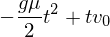

In [397]:
x_r = x_r.subs('C1', C1).subs('C2', C2)
x_r

Vstavimo podatke:

In [410]:
x_p = x_r.subs(g, 9.81).subs(mu, 0.1).subs(v0, 1)
x_p

In prikažemo:

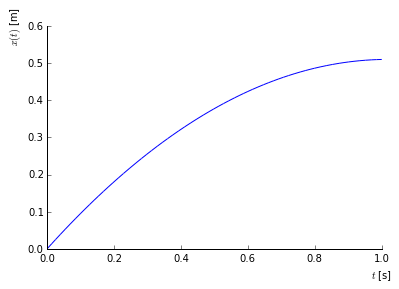

In [408]:
plot(x_p, (t, 0, 1), xlabel='$t$ [s]', ylabel='$x(t)$ [m]');

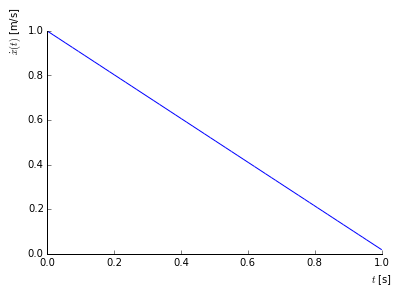

In [409]:
plot(x_p.diff(t), (t, 0, 1), xlabel='$t$ [s]', ylabel='$\dot{x}(t)$ [m/s]');

# Do naslednjih vaj preštudirajte sledeče:

1. Uvozite ves naslovni prostor iz ``SymPy``. Nastavite lep izpis rezultatov.
* Za trikotnik na sliki definirajte funkcijo za izračun površine in volumna.
<img src="others/trikotnik.png" width=300>

* Izračunajte številčne vrednosti (podatki naj bodo definirani v slovarju in si jih izmislite).
* Izračunajte statični moment ploskve $S_{xx}=\int_A y\,dA=\int_{0}^{b} y\,x(y)\,dy$, kjer je $x(y)=a-b\,y/b$.
* Izračunajte vztrajnostni moment ploskve $I_{xx}=\int_A y^2\,dA$.
* Prikažite $I_{xx}$ v odvisnosti od parametra $b$ ($a$ definirate poljubno)
* Nedoločeno in določeno (v mejah od 0 do $\tau$) integrirajte izraz: $\sin(5+t)+e^t$.
* Z odvajanjem pokažite pravilnost nedoločenega integrala iz predhodnega koraka.
* Za kotaleči valj (polmer $r$, masa $m$) povežite translatorno $x$ prostost z rotacijsko $\varphi$. Pozneje boste vse izrazili s slednjo.
* Določite translatorno kinetično energijo težišča (definirajte s hitrostjo $\dot x$, zaradi predhodne povezave, pa bi naj bil rezultat s $\dot{\varphi}$)
* Določite še masni vztrajnostni moment valja in rotacijsko kinetično energijo. Obe kinetični energiji seštejte in izraz poenostavite (če je potrebno).
* Če na valj deluje moment $-M$, definirajte mehansko energijo: $E_m=-M\,\varphi$ in določite gibalno enačbo iz spremembe mehanske energije: $\frac{d E_m}{d t}=\frac{d E_k}{d t}$
* Nadaljujete na predhodni enačbi: poiščete ``sympy`` funkcijo ``replace`` in ugotovite razliko z ``subs``. Poskusite s pomočjo ``replace`` $\dot{\varphi}$ na obeh straneh enačbe spremeniti v 1.
* Najdite rešitev za predhodno pridobljeno diferencialno enačbo.
* Izmislite se začetne pogoje in jih uporabite na predhodno rešeni diferencialni enačbi. Izmislite si še preostale podatke ter prikažite rezultat.
* Določite čas, ko je zasuk $\varphi$ spet enak začetnemu (če ste predpostavili začetni zasuk nič, potem torej iščete $\varphi=0$. Določite tudi čas, ko je kotna hitrost $\dot{\varphi}$ enaka nič.

# Ekstra

* ``sympy.mechanics``: ``sympy`` ima vgrajeno podporo za simuliranje sistama teles. Glejte tole predstavitev: http://pyvideo.org/video/2006/dynamics-with-sympy-mechanics-scipy-2013-present (tukaj je v predstavitvi prikazan primer: http://www.moorepants.info/blog/npendulum.html) 